## Final Project Submission

* Student name: Josephine Maro
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Maryanne Mwikali
* Blog post URL:


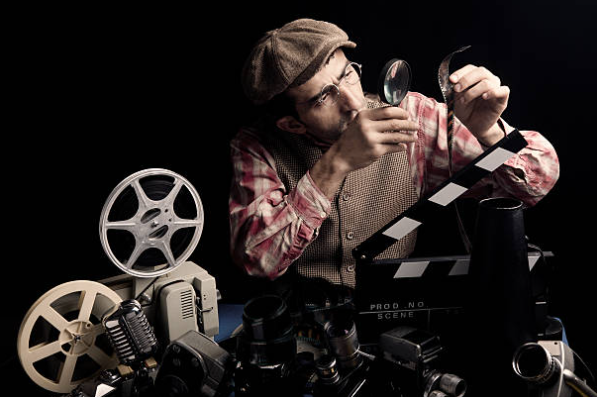

# Movie Analysis for Microsoft

## Author: Josephine Maro

## Overview


I have been charged with creating insights that will help Microsoft make the best decision as it begins to create original video content. I have conducted an analysis on whether the popular movie genres or the movies performing well at the box office are the company's priorities. I have provided the findings of my work to the executives of the movie studio. My analysis was aided by various data resources, utilization of descriptive statistics, and visualizations of the movie industry, which have led to the conclusion that higher budgets usually foster box office gross. In addition, I have given recommendations of studios to benchmark, majorly the relative aspects in their production process. This analysis will help Microsoft to divert the suitable expenditures to production, marketing, genre, release time, and leading studios for co-production purposes to attain maximum outcome.

## Business Problem

Microsoft seeks to broaden its horizon by venturing into the movie-making industry. Hence, I have been tasked to prepare a business analysis. I have, therefore, considered the top-grossing films worldwide. By studying the most commercialized movies, which have witnessed more significant revenue, I have made recommendations that Microsoft should consider. I have based my analysis on four main factors:

1. Movie Genre: Which genres of movies are currently the most successful?
2. Time of Release: When is the most profitable time of year to launch a movie?
3. Production Budget: What budget level tends to result in the highest box office revenue?
4. Additional Recommendations: What other characteristics do top-grossing movies typically share based on the analyzed data?

Based on the data information I was working on, I took into account when the changing and unpredictable times were more sensible and realistic in the movie industry. 
 

## Data Understanding

I utilized 4 data sources for this analysis, limiting the data from the yaer 2016.
 
1. Data Source One; imdb.title.basics.csv.gz. This is obtained from the IMDB website, wherein basic information such as run time, genre, and year of release of the top movies is covered.
2. Data Source Two; title.ratings.csv. This collection of ratings is a complementing feature that is meant to be associated with the movies covered in the basics dataset.
3. Data Source Three; tn.movie_budgets.csv. This datastream details the budget for Hollywood movies with the most significant historical gross sales. I used it as a platform to correspond budgets and determine how top-grossing blockbuster movies can be facilitated.
4. Data Source 4; bom.movie_gross.csv. The dataset includes global and US gross earnings of movies from 2010 through 2019. I was selective about the movie data, and I only extracted from movies that were released from the year 2016 to have the most recent data.

In [1]:

#Import all the packages necessary for the project
import pandas as pd
import sqlite3
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip


## Import all the data to use

In [2]:
#Imported the first dataset
#Read in bom movies gross
movie_gross= pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
#imported the second dataset
#Read in tmdb movies
tmdb = pd.read_csv ("zippedData/tmdb.movies.csv.gz")
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
#imported the third dataset
#read in tn.movie budgets
movie_budgets = pd.read_csv ("zippedData/tn.movie_budgets.csv.gz")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Cleaning the data

I Cleaned all the csv files to ensure dataset is accurate and meaningful.

Data cleaning steps as used for this project:

Check for missing values in each DataFrame and handle them (e.g., filling missing values with a specific value or dropping rows with missing values).

Check for and remove any duplicate rows in each DataFrame

Convert data types: Ensure that columns with similar data represent the same data type, i.e., date columns are in the same format and numerical columns are of the same type.
Standardize column names: different column names with the same information were standardized to avoid confusion.

Filter irrelevant columns: dropping columns to simplify the dataset.


In [5]:
#clean movie_gross

# Handle missing values
movie_gross = movie_gross.dropna()

# Remove duplicates
movie_gross = movie_gross.drop_duplicates()

# Convert data types
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# Standardize column names
movie_gross.columns = movie_gross.columns.str.lower().str.replace(' ', '_')
# Display cleaned DataFrame
movie_gross



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [6]:
# clean tmdb
# Remove duplicates
tmdb = tmdb.drop_duplicates()

# Convert release_date to datetime
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')

# Standardize column names (optional)
tmdb.columns = tmdb.columns.str.lower().str.replace(' ', '_')

# Display cleaned DataFrame
tmdb

,unnamed:_0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
#clean tn movie budgets
# Remove duplicates
movie_budgets = movie_budgets.drop_duplicates()

# Convert monetary columns to numeric data types
cols_to_convert = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in cols_to_convert:
    movie_budgets[col] = movie_budgets[col].str.replace('$', '').str.replace(',', '').astype(float)

# Convert release_date to datetime
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'], errors='coerce')

# Standardize column names (optional)
movie_budgets.columns = movie_budgets.columns.str.lower().str.replace(' ', '_')

# Display cleaned DataFrame
movie_budgets



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00


## Combine csv files into a single dataframe for easy analysis

left_on and right_on were used to specify which columns to use for the merge operation.

In this case, left_on='title' and right_on='title' are used to merge movie_gross and tmdb DataFrames on the title column, which is the common column between them.

Similarly, left_on='title' and right_on='movie' are used to merge the result of the first merge with the movie_budgets DataFrame. This is because the title column in the merged DataFrame corresponds to the movie column in the movie_budgets DataFrame.

The how='inner' parameter specifies that only the rows with matching values in both DataFrames should be included in the final merged DataFrame. This means that only movies that appear in all three DataFrames will be included in the merged_df.

In [8]:
# Merge movie_gross and tmdb DataFrames
merged_df = pd.merge(movie_gross, tmdb, left_on='title', right_on='title', how='inner')

# Merge with movie_budgets DataFrame
merged_df = pd.merge(merged_df, movie_budgets, left_on='title', right_on='movie', how='inner')

# # Drop unnecessary columns
merged_df = merged_df.drop(columns=['id_x', 'id_y', 'movie'])

# # Display the merged DataFrame
merged_df



,title,studio,domestic_gross_x,foreign_gross,year,unnamed:_0,genre_ids,original_language,original_title,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,7,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,Inception,WB,292600000.0,535700000.0,2010,4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186,2010-07-16,160000000.0,292576195.0,8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,38,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843,2010-05-21,165000000.0,238736787.0,7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,15,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,2010-06-30,68000000.0,300531751.0,7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368,2010-05-07,170000000.0,312433331.0,6.211564e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Hotel Artemis,Global Road,6700000.0,6000000.0,2018,23994,"[53, 878, 28]",en,Hotel Artemis,14.585,2018-06-08,5.9,471,2018-06-08,15000000.0,6708137.0,1.275880e+07
1193,Kin,LGF,5700000.0,4300000.0,2018,23871,"[878, 28]",en,Kin,23.805,2018-08-31,6.2,289,2018-08-31,30000000.0,5718096.0,1.009682e+07
1194,Suspiria,Amazon,2500000.0,5400000.0,2018,23936,"[27, 14]",en,Suspiria,16.925,2018-10-26,7.0,752,2018-10-26,20000000.0,2483472.0,7.034615e+06
1195,Destroyer,Annapurna,1500000.0,4000000.0,2018,23921,"[53, 80, 18, 28]",en,Destroyer,17.815,2018-12-25,5.9,176,2018-12-25,9000000.0,1533324.0,3.681096e+06


## Working with the IMDB dataset
I only used the movie_basics table which I found to be the most relevant based on my analysis objectives and research questions

In [9]:

import zipfile

# Open the ZIP file
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
    zip_ref.extractall("zippedData")
# Connect to the database
    conn = sqlite3.connect("zippedData/im.db")
# prompt query for finding table names
    cur= conn.cursor()
# Do something with the database connection
    cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
    table_names = cur.fetchall()
table_names



[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [10]:
# Read tables into DataFrames
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)

# Display movie_basics table
print("Movie Basics Table:")
print(movie_basics)

Movie Basics Table:
         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din  

## Cleaning the IMDB dataset

In [11]:
import time

# Function to execute SQL queries with retry mechanism
def execute_query(conn, query, retries=5, delay=1):
    for attempt in range(retries):
        try:
            cur = conn.cursor()
            cur.execute(query)
            conn.commit()
            return cur.fetchall()
        except sqlite3.OperationalError as e:
            if "database is locked" in str(e):
                if attempt == retries - 1:
                    raise e
                else:
                    print(f"Database is locked, retrying in {delay} seconds...")
                    time.sleep(delay)
            else:
                raise e

# Connect to the database
conn = sqlite3.connect("zippedData/im.db", timeout=30)

# Clean movie_basics table
print("Cleaning movie_basics table...")
query = """
DELETE FROM movie_basics
WHERE primary_title IS NULL
"""
execute_query(conn, query)

query = """
DELETE FROM movie_basics
WHERE rowid NOT IN (
    SELECT MIN(rowid)
    FROM movie_basics
    GROUP BY movie_id
)
"""
execute_query(conn, query)

# Close the connection
conn.close()

print("Data cleaning completed successfully.")



Cleaning movie_basics table...
Data cleaning completed successfully.


### View the cleaned IMDB dataset


In [12]:
# Connect to the cleaned database
conn = sqlite3.connect("zippedData/im.db")

# Read cleaned tables into DataFrames
cleaned_movie_basics = pd.read_sql_query("SELECT * FROM movie_basics;", conn)

# Display cleaned movie_basics table
print("Cleaned Movie Basics Table:")
print(cleaned_movie_basics)

# Close the connection
conn.close()


Cleaned Movie Basics Table:
         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka 

In [13]:
# Drop all the NaN values in the column named runtime minutes
movie_basics_cleaned = cleaned_movie_basics.dropna(subset=['runtime_minutes'])

# Display table
print("Movie Basics Table without NaN values:")
print(movie_basics_cleaned)



Movie Basics Table without NaN values:
         movie_id                                      primary_title  \
0       tt0063540                                          Sunghursh   
1       tt0066787                    One Day Before the Rainy Season   
2       tt0069049                         The Other Side of the Wind   
4       tt0100275                           The Wandering Soap Opera   
5       tt0111414                                        A Thin Life   
...           ...                                                ...   
146135  tt9916170                                      The Rehearsal   
146136  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...   
146137  tt9916190                                          Safeguard   
146139  tt9916538                                Kuambil Lagi Hatiku   
146142  tt9916730                                             6 Gunn   

                                           original_title  start_year  \
0                      

In [14]:
# Drop the 'original_title' and 'runtime_minutes' columns
cleaned_movie_basics_final = movie_basics_cleaned.drop(columns=['primary_title', 'runtime_minutes'])

# Display the final cleaned table
print("Final Cleaned Movie Basics Table:")
print(cleaned_movie_basics_final)



Final Cleaned Movie Basics Table:
         movie_id                                     original_title  \
0       tt0063540                                          Sunghursh   
1       tt0066787                                    Ashad Ka Ek Din   
2       tt0069049                         The Other Side of the Wind   
4       tt0100275                              La Telenovela Errante   
5       tt0111414                                        A Thin Life   
...           ...                                                ...   
146135  tt9916170                                           O Ensaio   
146136  tt9916186  Illenau - die Geschichte einer ehemaligen Heil...   
146137  tt9916190                                          Safeguard   
146139  tt9916538                                Kuambil Lagi Hatiku   
146142  tt9916730                                             6 Gunn   

        start_year                genres  
0             2013    Action,Crime,Drama  
1             2

## Cleaned Datasets
I have two dataframes containing everything needed for the analyis.
1. Table 1; Merged_df - Contains information on movies, production budget, movie studios and worldwide gross
2. table 2; Final cleaned movie basics table - Contains information on movies, their genres and year of release

## Data Analysis
To achieve the project's goals and objectives, I conducted exploratory analyses focusing on movie genres, release time, and budget. I employed statistical methods and visualizations to examine the relationship between these categories and the worldwide gross of movies. While data on domestic and international gross was available for most movies, I chose to use worldwide gross as it represents the total revenue Microsoft aims to generate from a production.
However, based on the dataset, the dollar amounts were not easily plotted due to their data type being 'object'. Consequently, I reevaluated the columns for gross and budget, creating new columns to represent budget and worldwide gross in millions.


In [15]:
# Using the merged_df table
#convert the values in millions to a smaller figure that supports better visualisation.
merged_df['budget'] = merged_df['production_budget'] / 1000000

In [16]:
merged_df['world_gross_millions'] = merged_df['worldwide_gross']/1000000


In [17]:
merged_df.describe()

,domestic_gross_x,foreign_gross,year,unnamed:_0,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,budget,world_gross_millions
count,1.197000e+03,1.193000e+03,1197.000000,1197.00000,1197.000000,1197,1197.000000,1197.000000,1197,1.197000e+03,1.197000e+03,1.197000e+03,1197.000000,1197.000000
mean,7.206654e+07,1.057879e+08,2013.754386,11009.27736,13.887809,2014-02-04 17:29:01.353383424,6.418546,2580.086048,2014-02-14 14:04:30.676691712,5.403385e+07,7.234351e+07,1.809119e+08,54.033845,180.911946
min,8.000000e+02,6.000000e+02,2010.000000,1.00000,0.600000,1968-12-23 00:00:00,1.000000,1.000000,1967-09-18 00:00:00,1.000000e+05,0.000000e+00,0.000000e+00,0.100000,0.000000
25%,1.580000e+07,1.140000e+07,2011.000000,2912.00000,9.034000,2011-11-17 00:00:00,5.900000,565.000000,2011-12-09 00:00:00,1.450000e+07,1.609900e+07,3.306930e+07,14.500000,33.069303
50%,4.140000e+07,4.110000e+07,2014.000000,11054.00000,12.408000,2014-03-14 00:00:00,6.400000,1465.000000,2014-04-25 00:00:00,3.100000e+07,4.202514e+07,8.545048e+07,31.000000,85.450484
75%,8.930000e+07,1.195000e+08,2016.000000,17495.00000,16.646000,2016-06-24 00:00:00,7.000000,3406.000000,2016-07-27 00:00:00,7.000000e+07,8.910724e+07,2.150984e+08,70.000000,215.098356
max,7.001000e+08,9.464000e+08,2018.000000,26339.00000,80.773000,2018-12-25 00:00:00,10.000000,22186.000000,2018-12-25 00:00:00,4.106000e+08,7.000596e+08,2.048134e+09,410.600000,2048.134200
std,9.214443e+07,1.569128e+08,2.559295,7819.46951,8.231454,NaN,0.881228,3052.477414,NaN,5.871474e+07,9.199889e+07,2.501029e+08,58.714735,250.102899


## Genre


### Top rated genres

In [18]:
#back to cleaned_movie_basics_final table
# 'count method' evaluates number of movies in each genre.
#Limit to 10 genres.
genre = cleaned_movie_basics_final ['genres'].value_counts().nlargest(10)
genre

genres
Documentary              24672
Drama                    15725
Comedy                    6413
Comedy,Drama              3163
Horror                    2975
Biography,Documentary     2052
Thriller                  1924
Drama,Romance             1806
Documentary,Drama         1515
Comedy,Drama,Romance      1451
Name: count, dtype: int64

In [19]:
#create new dataframe for easy plotting
# Data for the top 10 genres
data = {
    'genres': ['Documentary', 'Drama', 'Comedy', 'Comedy,Drama', 'Horror', 
               'Biography,Documentary', 'Thriller', 'Drama,Romance', 
               'Documentary,Drama', 'Comedy,Drama,Romance'],
    'count': [24672, 15725, 6413, 3163, 2975, 2052, 1924, 1806, 1515, 1451]
}

# Create a DataFrame
genre_df = pd.DataFrame(data)

# Display the DataFrame
print("Top 10 Genres DataFrame:")
print(genre_df)


Top 10 Genres DataFrame:
                  genres  count
0            Documentary  24672
1                  Drama  15725
2                 Comedy   6413
3           Comedy,Drama   3163
4                 Horror   2975
5  Biography,Documentary   2052
6               Thriller   1924
7          Drama,Romance   1806
8      Documentary,Drama   1515
9   Comedy,Drama,Romance   1451


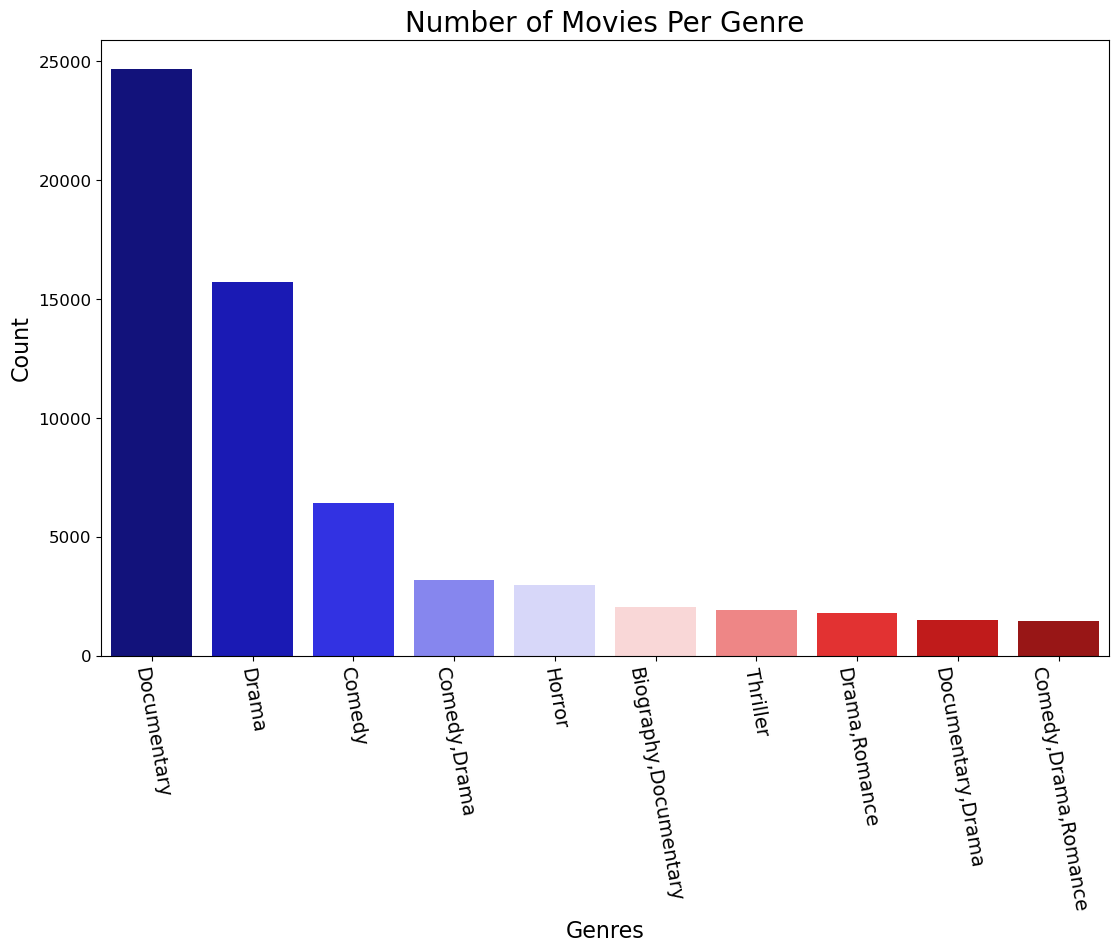

In [20]:
# plotting the top rated genre to visualise the data.
plt.figure(figsize=(13,8))
sns.barplot(x='genres',y='count', data=genre_df, palette='seismic')
plt.title('Number of Movies Per Genre', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genres', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
#saved in images as fig1

From this analysis, the highest-rated movies have consistently been in the Documentary, Drama, and Comedy genres respectively.Others that have been highly rated include romance, thriller, horror, etc. It is advisable to consider creating a movie within these top three genres, as they have shown a greater likelihood of achieving a high worldwide gross. Furthermore, combining a less popular genre with one of the top three genres could potentially elevate its appeal and success.

## Production Budget Analysis

#### The top spending and returns from 2016
using the merged df table for this analysis

In [21]:
merged_df.head()

,title,studio,domestic_gross_x,foreign_gross,year,unnamed:_0,genre_ids,original_language,original_title,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,budget,world_gross_millions
0,Toy Story 3,BV,415000000.0,652000000.0,2010,7,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,7.7,8340,2010-06-18,200000000.0,415004880.0,1.068880e+09,200.0,1068.879522
1,Inception,WB,292600000.0,535700000.0,2010,4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,8.3,22186,2010-07-16,160000000.0,292576195.0,8.355246e+08,160.0,835.524642
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,38,"[35, 12, 14, 16, 10751]",en,Shrek Forever After,15.041,2010-05-16,6.1,3843,2010-05-21,165000000.0,238736787.0,7.562447e+08,165.0,756.244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,15,"[12, 14, 18, 10749]",en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,2010-06-30,68000000.0,300531751.0,7.061028e+08,68.0,706.102828
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,6.8,12368,2010-05-07,170000000.0,312433331.0,6.211564e+08,170.0,621.156389


## Top 100 grossing movies

In [22]:
#Arrange movies from highest grossing (descending order)
grossingmovies_visualisation = merged_df.sort_values(by='world_gross_millions', ascending = False)
#Filter to top 100 grossing
grossingmovies_visualisation = grossingmovies_visualisation.head(100)
grossingmovies_visualisation

,title,studio,domestic_gross_x,foreign_gross,year,unnamed:_0,genre_ids,original_language,original_title,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,budget,world_gross_millions
1104,Avengers: Infinity War,BV,678800000.0,NaN,2018,23811,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,2018-04-27,300000000.0,678815482.0,2.048134e+09,300.0,2048.134200
676,Jurassic World,Uni.,652300000.0,NaN,2015,14193,"[28, 12, 878, 53]",en,Jurassic World,20.709,2015-06-12,6.6,14056,2015-06-12,215000000.0,652270625.0,1.648855e+09,215.0,1648.854864
677,Furious 7,Uni.,353000000.0,NaN,2015,14196,"[28, 80, 53]",en,Furious 7,20.396,2015-04-03,7.3,6538,2015-04-03,190000000.0,353007020.0,1.518723e+09,190.0,1518.722794
678,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,14169,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,2015-05-01,7.3,13457,2015-05-01,330600000.0,459005868.0,1.403014e+09,330.6,1403.013963
1106,Black Panther,BV,700100000.0,646900000.0,2018,23817,"[28, 12, 14, 878]",en,Black Panther,44.140,2018-02-16,7.4,12365,2018-02-16,200000000.0,700059566.0,1.348258e+09,200.0,1348.258224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Tangled,BV,200800000.0,391000000.0,2010,13,"[16, 10751]",en,Tangled,21.511,2010-11-24,7.5,6407,2010-11-24,260000000.0,200821936.0,5.864772e+08,260.0,586.477240
171,The Hangover Part II,WB,254500000.0,332300000.0,2011,2469,[35],en,The Hangover Part II,32.266,2011-05-25,6.4,6231,2011-05-26,80000000.0,254464305.0,5.864643e+08,80.0,586.464305
1114,Ready Player One,WB,137700000.0,445200000.0,2018,23840,"[12, 878]",en,Ready Player One,30.029,2018-03-29,7.6,7021,2018-03-29,150000000.0,137690172.0,5.792901e+08,150.0,579.290136
449,The Croods,Fox,187200000.0,400000000.0,2013,7914,"[28, 12, 16, 35, 10751, 14]",en,The Croods,16.290,2013-03-22,6.8,3873,2013-03-22,135000000.0,187168425.0,5.730684e+08,135.0,573.068425


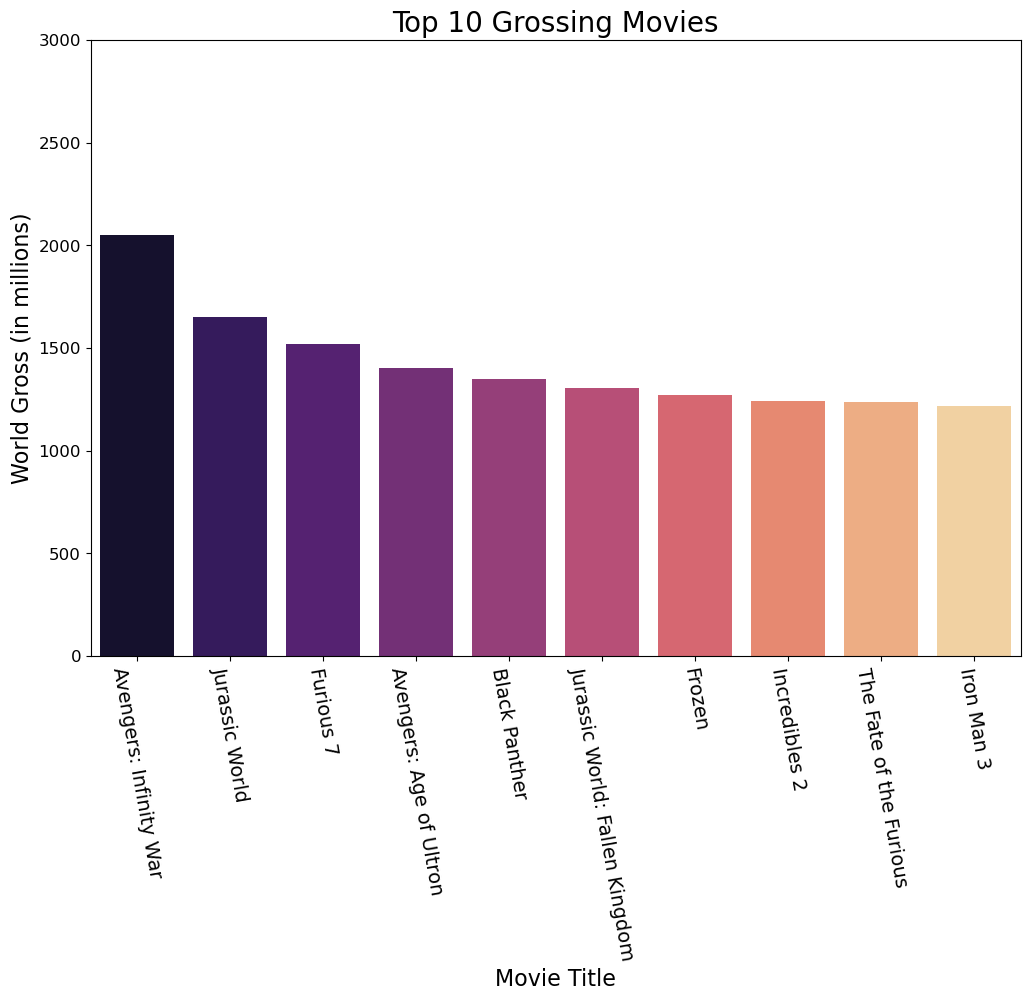

In [23]:
#Filter to top 10 grossing movies.
#create a plot
# plotting the top rated genre to visualise the data.
plt.figure(figsize=(12,8))
sns.barplot(x='title',y='world_gross_millions', data=grossingmovies_visualisation.head(12), palette='magma')
plt.title('Top 10 Grossing Movies', fontsize=20)
plt.ylabel('World Gross (in millions)', fontsize=16)
plt.xlabel('Movie Title', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80)
plt.ylim(0, 3000);

## Top grossing in the past 8years
The dataframe is now restricted to movies released from 2016

In [24]:
#Filter the movies released from 2016.
grossingmovies_visualisation = grossingmovies_visualisation[grossingmovies_visualisation['year'] >= 2016]
#Reset the index
grossingmovies_visualisation.reset_index(inplace=True)
grossingmovies_visualisation

,index,title,studio,domestic_gross_x,foreign_gross,year,unnamed:_0,genre_ids,original_language,original_title,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,budget,world_gross_millions
0,1104,Avengers: Infinity War,BV,678800000.0,NaN,2018,23811,"[12, 28, 14]",en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948,2018-04-27,300000000.0,678815482.0,2.048134e+09,300.0,2048.134200
1,1106,Black Panther,BV,700100000.0,646900000.0,2018,23817,"[28, 12, 14, 878]",en,Black Panther,44.140,2018-02-16,7.4,12365,2018-02-16,200000000.0,700059566.0,1.348258e+09,200.0,1348.258224
2,1105,Black Panther,BV,700100000.0,646900000.0,2018,3444,"[28, 16]",en,Black Panther,2.058,2011-01-18,5.1,11,2018-02-16,200000000.0,700059566.0,1.348258e+09,200.0,1348.258224
3,1107,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,23829,"[28, 12, 878]",en,Jurassic World: Fallen Kingdom,34.958,2018-06-22,6.5,5995,2018-06-22,170000000.0,417719760.0,1.305773e+09,170.0,1305.772799
4,1108,Incredibles 2,BV,608600000.0,634200000.0,2018,23826,"[28, 12, 16, 10751]",en,Incredibles 2,36.286,2018-06-15,7.6,6354,2018-06-15,200000000.0,608581744.0,1.242521e+09,200.0,1242.520711
5,984,The Fate of the Furious,Uni.,226000000.0,NaN,2017,20630,"[28, 80, 53]",en,The Fate of the Furious,28.668,2017-04-14,6.9,6335,2017-04-14,250000000.0,225764765.0,1.234846e+09,250.0,1234.846267
6,1109,Aquaman,WB,335100000.0,812700000.0,2018,23824,"[28, 12, 14]",en,Aquaman,38.102,2018-12-21,6.8,6155,2018-12-21,160000000.0,335061807.0,1.146895e+09,160.0,1146.894640
7,840,Captain America: Civil War,BV,408100000.0,745200000.0,2016,17382,"[12, 28, 878]",en,Captain America: Civil War,39.137,2016-05-06,7.4,14000,2016-05-06,250000000.0,408084349.0,1.140069e+09,250.0,1140.069413
8,842,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,20655,"[28, 12, 878]",en,Rogue One: A Star Wars Story,21.401,2016-12-16,7.5,9296,2016-12-16,200000000.0,532177324.0,1.049103e+09,200.0,1049.102856
9,841,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,17401,"[28, 12, 878]",en,Rogue One: A Star Wars Story,21.401,2016-12-16,7.5,9296,2016-12-16,200000000.0,532177324.0,1.049103e+09,200.0,1049.102856


## Creating a new column- profits

In [25]:
#I saw the need to introduce this column to determine the difference between the budget and the gross.
grossingmovies_visualisation['profits'] = grossingmovies_visualisation['world_gross_millions']-grossingmovies_visualisation['budget']
grossingmovies_visualisation

C:\Users\HP\AppData\Local\Temp\ipykernel_7012\1156812376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossingmovies_visualisation['profits'] = grossingmovies_visualisation['world_gross_millions']-grossingmovies_visualisation['budget']


,index,title,studio,domestic_gross_x,foreign_gross,year,unnamed:_0,genre_ids,original_language,original_title,...,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,budget,world_gross_millions,profits
0,1104,Avengers: Infinity War,BV,678800000.0,NaN,2018,23811,"[12, 28, 14]",en,Avengers: Infinity War,...,2018-04-27,8.3,13948,2018-04-27,300000000.0,678815482.0,2.048134e+09,300.0,2048.134200,1748.134200
1,1106,Black Panther,BV,700100000.0,646900000.0,2018,23817,"[28, 12, 14, 878]",en,Black Panther,...,2018-02-16,7.4,12365,2018-02-16,200000000.0,700059566.0,1.348258e+09,200.0,1348.258224,1148.258224
2,1105,Black Panther,BV,700100000.0,646900000.0,2018,3444,"[28, 16]",en,Black Panther,...,2011-01-18,5.1,11,2018-02-16,200000000.0,700059566.0,1.348258e+09,200.0,1348.258224,1148.258224
3,1107,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,23829,"[28, 12, 878]",en,Jurassic World: Fallen Kingdom,...,2018-06-22,6.5,5995,2018-06-22,170000000.0,417719760.0,1.305773e+09,170.0,1305.772799,1135.772799
4,1108,Incredibles 2,BV,608600000.0,634200000.0,2018,23826,"[28, 12, 16, 10751]",en,Incredibles 2,...,2018-06-15,7.6,6354,2018-06-15,200000000.0,608581744.0,1.242521e+09,200.0,1242.520711,1042.520711
5,984,The Fate of the Furious,Uni.,226000000.0,NaN,2017,20630,"[28, 80, 53]",en,The Fate of the Furious,...,2017-04-14,6.9,6335,2017-04-14,250000000.0,225764765.0,1.234846e+09,250.0,1234.846267,984.846267
6,1109,Aquaman,WB,335100000.0,812700000.0,2018,23824,"[28, 12, 14]",en,Aquaman,...,2018-12-21,6.8,6155,2018-12-21,160000000.0,335061807.0,1.146895e+09,160.0,1146.894640,986.894640
7,840,Captain America: Civil War,BV,408100000.0,745200000.0,2016,17382,"[12, 28, 878]",en,Captain America: Civil War,...,2016-05-06,7.4,14000,2016-05-06,250000000.0,408084349.0,1.140069e+09,250.0,1140.069413,890.069413
8,842,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,20655,"[28, 12, 878]",en,Rogue One: A Star Wars Story,...,2016-12-16,7.5,9296,2016-12-16,200000000.0,532177324.0,1.049103e+09,200.0,1049.102856,849.102856
9,841,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,17401,"[28, 12, 878]",en,Rogue One: A Star Wars Story,...,2016-12-16,7.5,9296,2016-12-16,200000000.0,532177324.0,1.049103e+09,200.0,1049.102856,849.102856


## Release time analysis
This analysis visualizes the gross attained corresponding to the release month

In [26]:
#Change the date format
grossingmovies_visualisation['release_date_y'] = pd.to_datetime(grossingmovies_visualisation.release_date_y)
#Creating separate columns for release year and month
grossingmovies_visualisation['month'] = grossingmovies_visualisation['release_date_y'].dt.month
grossingmovies_visualisation['year'] = grossingmovies_visualisation['release_date_y'].dt.year
grossingmovies_visualisation.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_7012\3765404141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossingmovies_visualisation['release_date_y'] = pd.to_datetime(grossingmovies_visualisation.release_date_y)
C:\Users\HP\AppData\Local\Temp\ipykernel_7012\3765404141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grossingmovies_visualisation['month'] = grossingmovies_visualisation['release_date_y'].dt.month
C:\Users\HP\AppData\Local\Temp\ipykernel_7012\3765404141.py:5: SettingWithCopyWarning: 
A

,index,title,studio,domestic_gross_x,foreign_gross,year,unnamed:_0,genre_ids,original_language,original_title,...,vote_average,vote_count,release_date_y,production_budget,domestic_gross_y,worldwide_gross,budget,world_gross_millions,profits,month
0,1104,Avengers: Infinity War,BV,678800000.0,NaN,2018,23811,"[12, 28, 14]",en,Avengers: Infinity War,...,8.3,13948,2018-04-27,300000000.0,678815482.0,2.048134e+09,300.0,2048.134200,1748.134200,4
1,1106,Black Panther,BV,700100000.0,646900000.0,2018,23817,"[28, 12, 14, 878]",en,Black Panther,...,7.4,12365,2018-02-16,200000000.0,700059566.0,1.348258e+09,200.0,1348.258224,1148.258224,2
2,1105,Black Panther,BV,700100000.0,646900000.0,2018,3444,"[28, 16]",en,Black Panther,...,5.1,11,2018-02-16,200000000.0,700059566.0,1.348258e+09,200.0,1348.258224,1148.258224,2
3,1107,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,23829,"[28, 12, 878]",en,Jurassic World: Fallen Kingdom,...,6.5,5995,2018-06-22,170000000.0,417719760.0,1.305773e+09,170.0,1305.772799,1135.772799,6
4,1108,Incredibles 2,BV,608600000.0,634200000.0,2018,23826,"[28, 12, 16, 10751]",en,Incredibles 2,...,7.6,6354,2018-06-15,200000000.0,608581744.0,1.242521e+09,200.0,1242.520711,1042.520711,6


(0.0, 350.0)

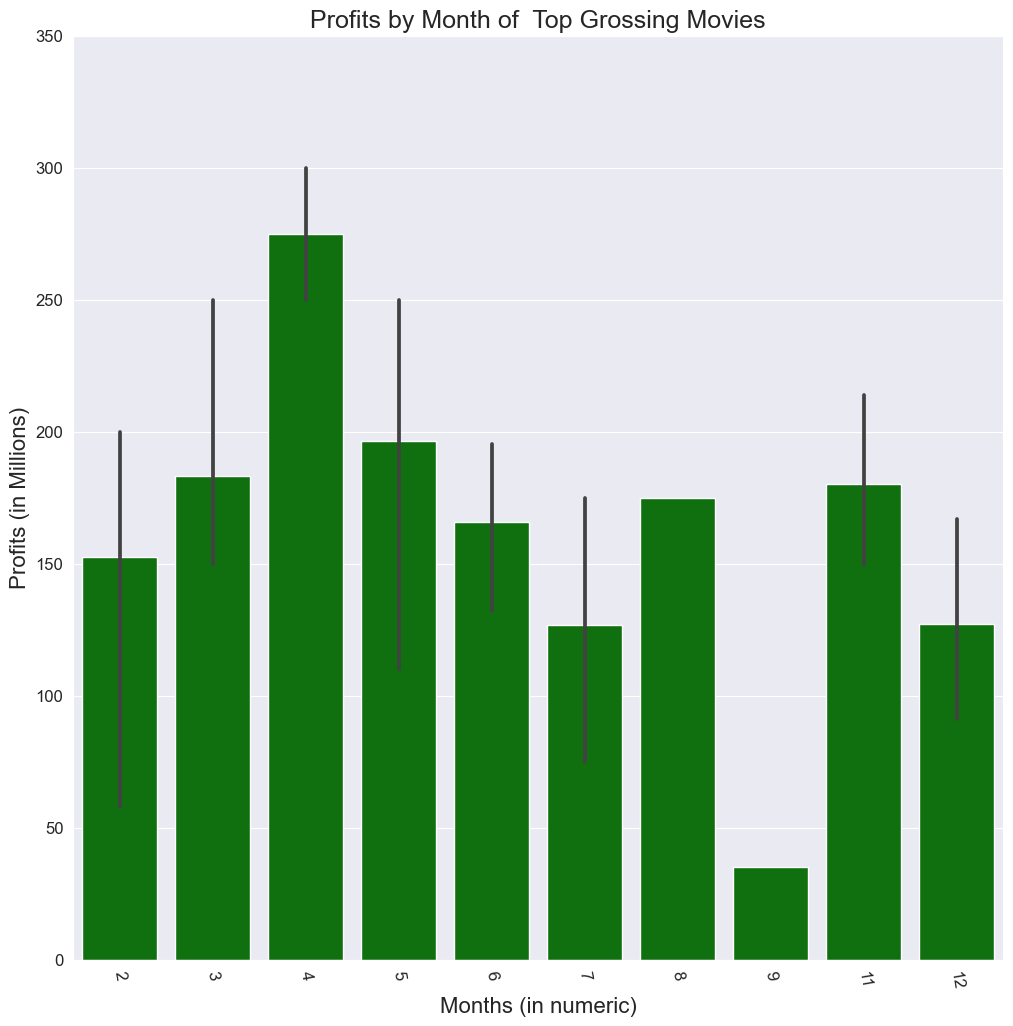

In [27]:
# A bargraph showing top grossing movies by month of release.
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
sns.barplot(data=grossingmovies_visualisation, x="month", y="budget", color='green',)
plt.title('Profits by Month of  Top Grossing Movies', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Months (in numeric)', fontsize=16)
plt.ylabel('Profits (in Millions)', fontsize=16)
plt.ylim(0, 350)


## Top grossing movies from 2016

(0.0, 1500.0)

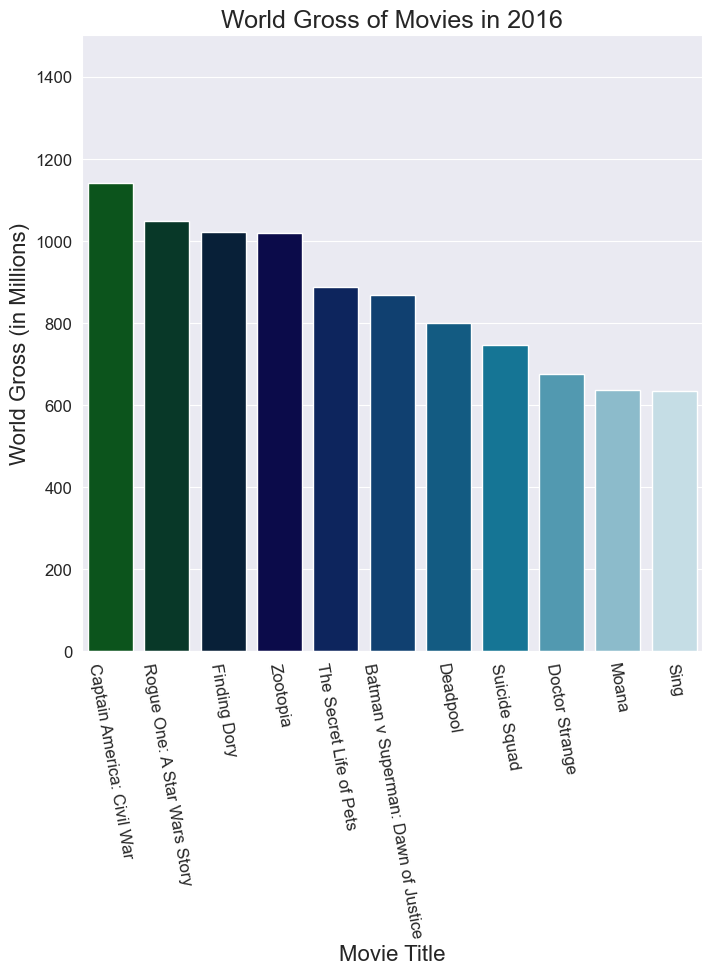

In [42]:
# Top grossing movies in 2016
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.barplot(data=grossingmovies_visualisation[grossingmovies_visualisation['year'] == 2016], x="title", y="world_gross_millions", palette='ocean')
plt.title('World Gross of Movies in 2016', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('World Gross (in Millions)', fontsize=16)
plt.ylim(0, 1500)


(0.0, 1500.0)

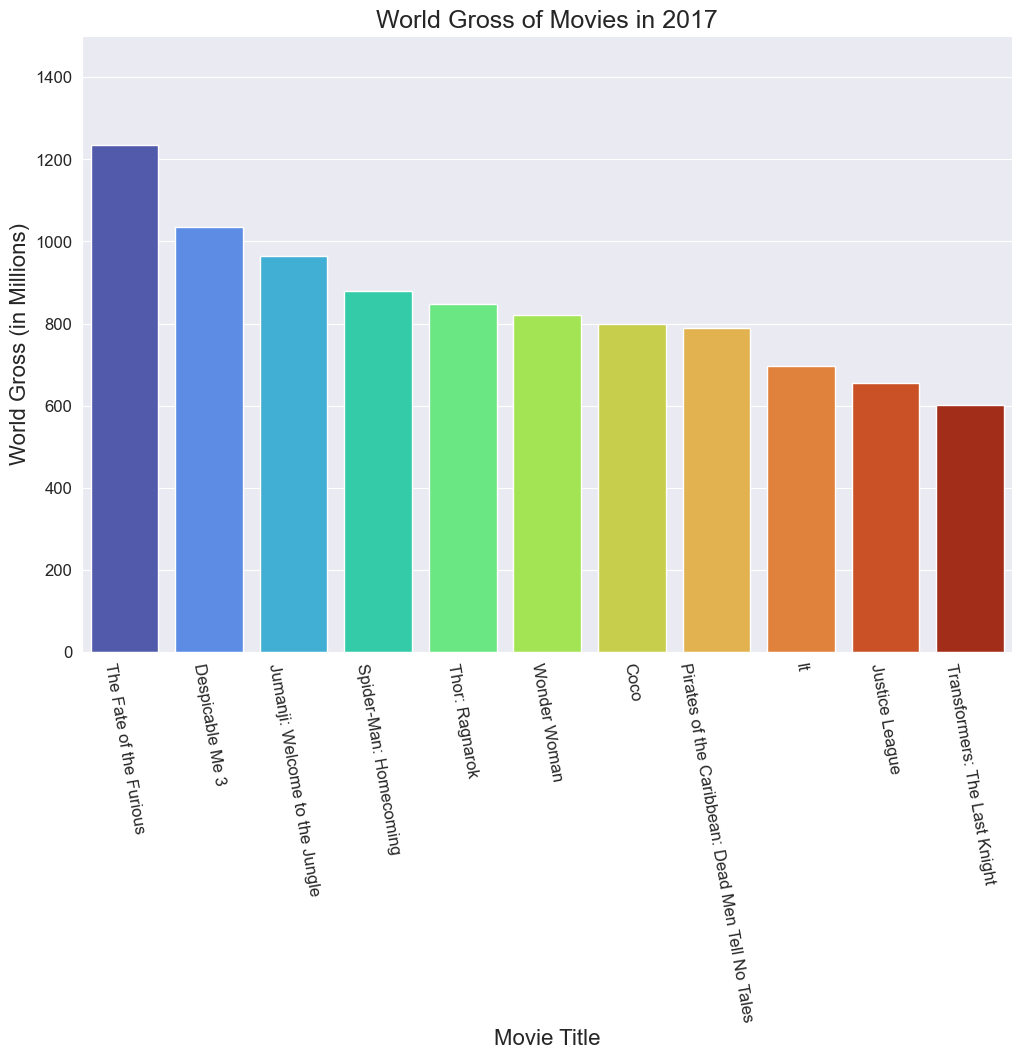

In [43]:
# Top grossing movies in 2017
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=grossingmovies_visualisation[grossingmovies_visualisation['year'] == 2017], x="title", y="world_gross_millions", palette='turbo')
plt.title('World Gross of Movies in 2017', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('World Gross (in Millions)', fontsize=16)
plt.ylim(0, 1500)


(0.0, 2500.0)

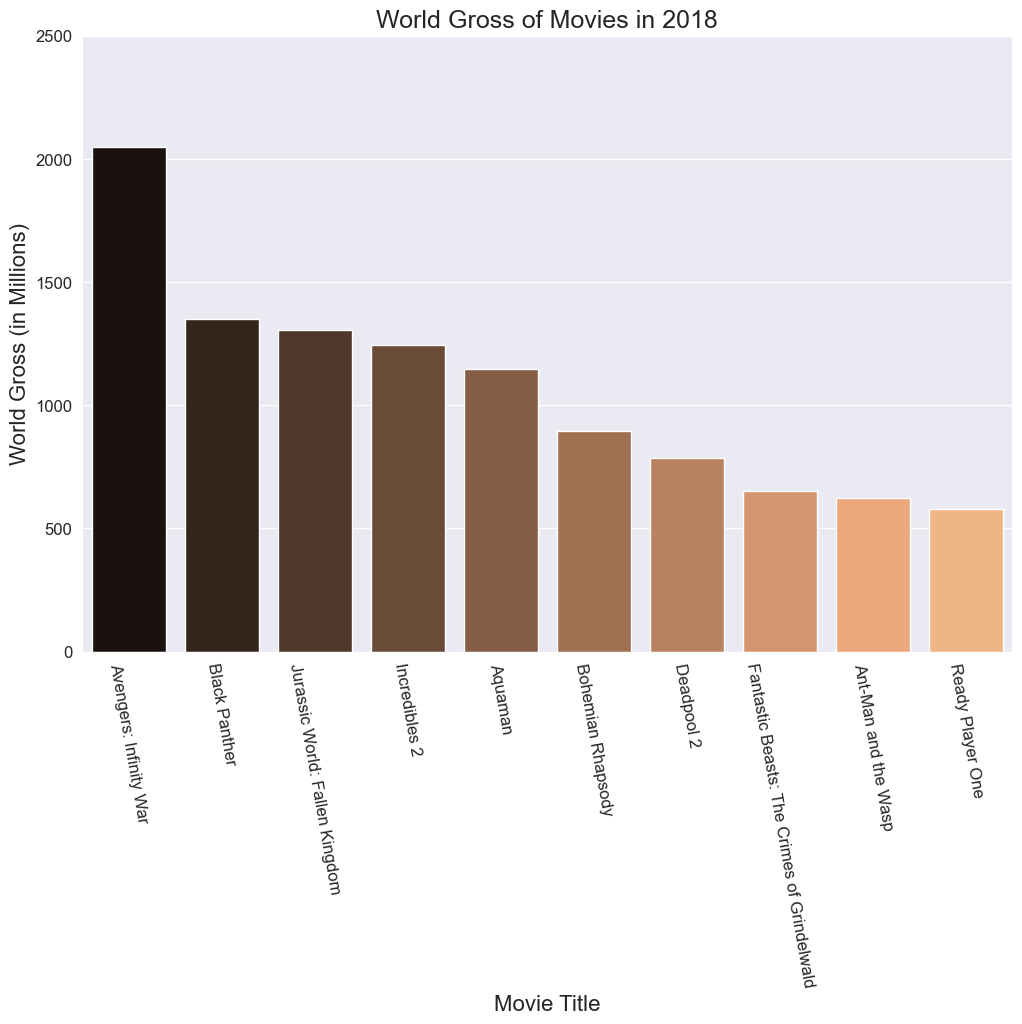

In [45]:
# Top grossing movies in 2018
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=grossingmovies_visualisation[grossingmovies_visualisation['year'] == 2018], x="title", y="world_gross_millions", palette='copper')
plt.title('World Gross of Movies in 2018', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Movie Title', fontsize=16)
plt.ylabel('World Gross (in Millions)', fontsize=16)
plt.ylim(0, 2500)


## Profit analysis since 2016

(0.0, 1200.0)

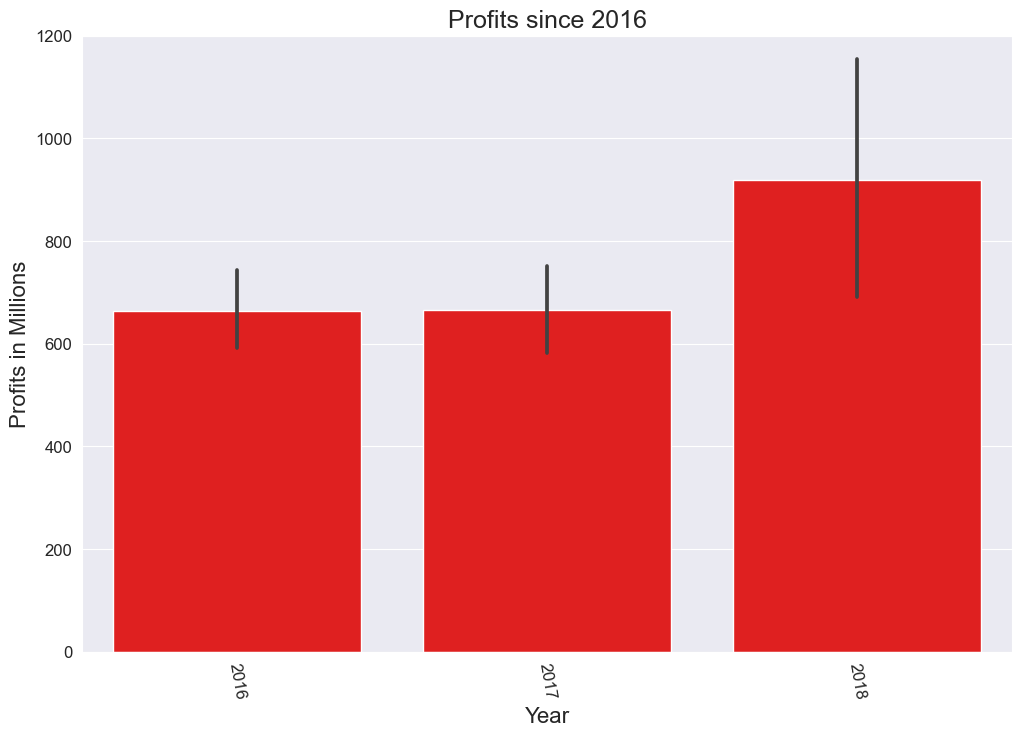

In [48]:
# plotting a bargraph for profits of movies in years 206-2019
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=grossingmovies_visualisation, x="year", y="profits", color='Red',)
plt.title('Profits since 2016', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Year', fontsize=16)
plt.ylabel('Profits in Millions', fontsize=16)
plt.ylim(0, 1200)

From the above analysis, the movies released in 2018 made the highest profits

## Profit based on month of release


(0.0, 2000.0)

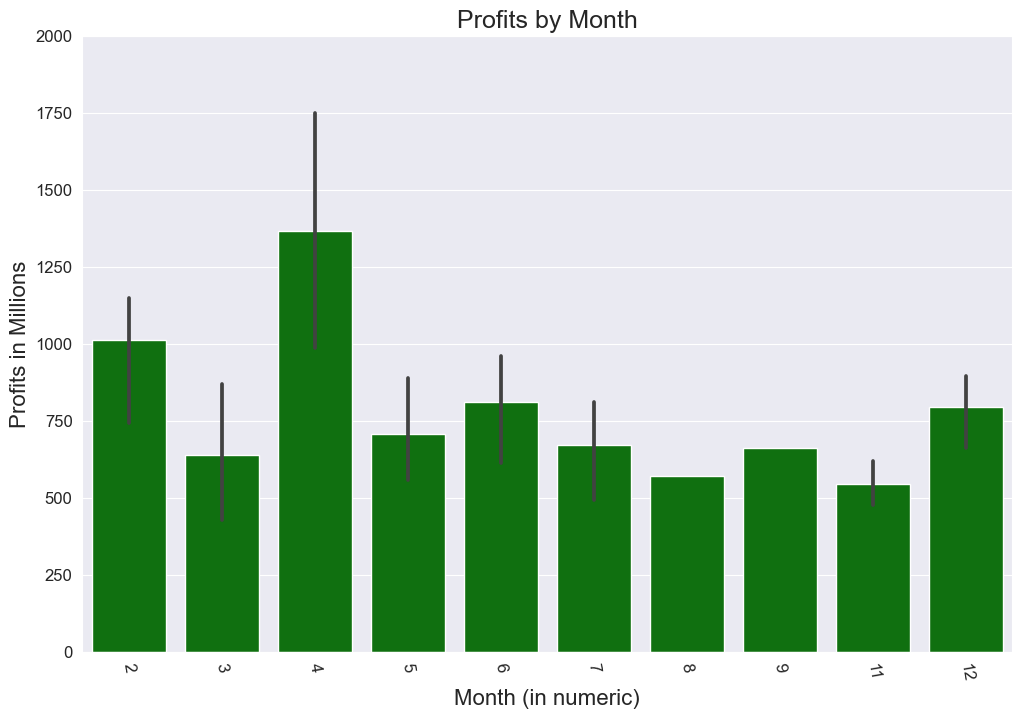

In [50]:
# plotting a bargraph for top grossing movies in 2016
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.barplot(data=grossingmovies_visualisation, x="month", y="profits", color='Green',)
plt.title('Profits by Month', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-80);
plt.xlabel('Month (in numeric)', fontsize=16)
plt.ylabel('Profits in Millions', fontsize=16)
plt.ylim(0, 2000)



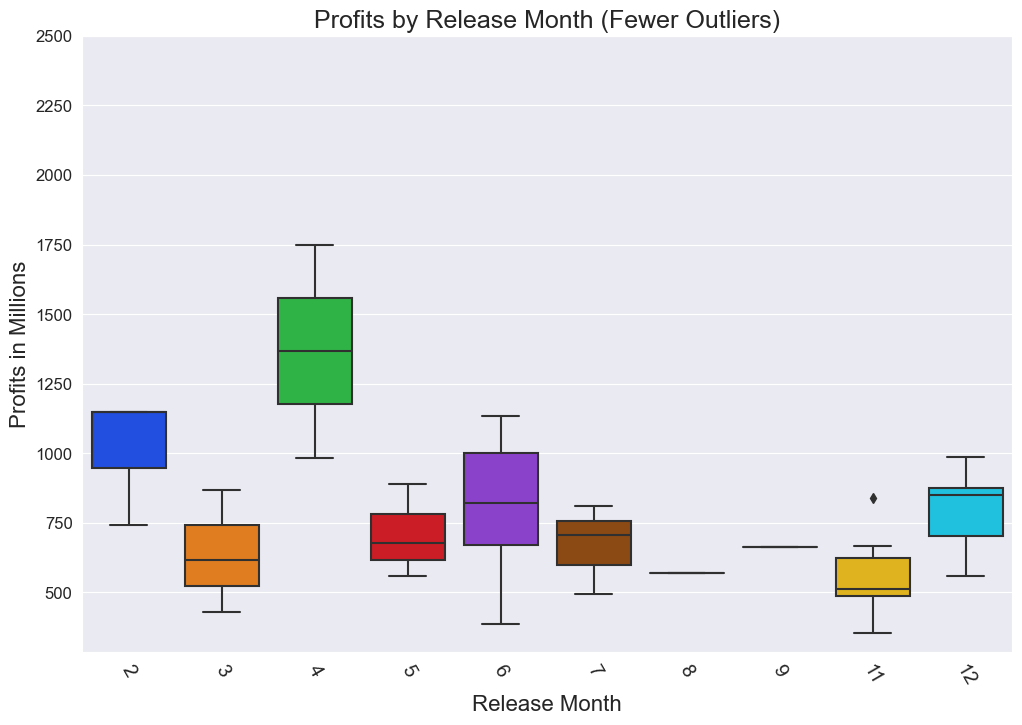

In [51]:
#Removing outliers using a boxplot
# plot with fewer outliers
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.boxplot(x='month', y='profits', data=grossingmovies_visualisation, palette='bright')
plt.xticks(rotation=-60)
plt.ylabel('Profits in Millions', fontsize=16)
plt.xlabel('Release Month', fontsize =16)
plt.title('Profits by Release Month (Fewer Outliers)', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(None, 2500);

The highest profits were observed during the first half of the year, with April, February, June, and December standing out as the top-performing months. April emerges as a more favorable choice for movie releases compared to June. Furthermore, December emerges as a strong contender for the third-best choice due to its position as the most profitable month in the second half of the year.